In [4]:
import pandas as pd
df = pd.read_csv('http://home.agh.edu.pl/~czech/vis-datasets/misc/nyt-frame.csv', header = 0)
data = df.iloc[:,9:]
array = data.values

In [75]:
print(df)

     Unnamed: 0 class.labels        X.  X.d  X.nd       X.s      X.th  X.this  \
0             1          art  0.008707  0.0   0.0  0.000000  0.009251     0.0   
1             2          art  0.005848  0.0   0.0  0.000000  0.000000     0.0   
2             3          art  0.016036  0.0   0.0  0.011403  0.000000     0.0   
3             4          art  0.026415  0.0   0.0  0.000000  0.000000     0.0   
4             5          art  0.007285  0.0   0.0  0.011008  0.000000     0.0   
..          ...          ...       ...  ...   ...       ...       ...     ...   
97           98        music  0.006929  0.0   0.0  0.000000  0.000000     0.0   
98           99        music  0.111882  0.0   0.0  0.000000  0.000000     0.0   
99          100        music  0.006550  0.0   0.0  0.000000  0.000000     0.0   
100         101        music  0.009497  0.0   0.0  0.000000  0.040362     0.0   
101         102        music  0.015930  0.0   0.0  0.000000  0.029016     0.0   

            a  abandoned  .

In [9]:
import numpy as np
header = list(df.columns.values[9:])
sample_word = np.random.choice(header, 20, replace=False)
print(sample_word)

['applause' 'canal' 'liberty' 'lost' 'him' 'harsh' 'mezzo' 'eastern'
 'replied' 'chadds' 'selling' 'tear' 'light' 'parts' 'technically' 'older'
 'familiar' 'lying' 'afford' 'masks']


In [28]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(array)
print(X_pca.shape)

(102, 102)


In [74]:
num_of_vals = 15
arguments = df.iloc[:,9:].columns
print('-------PCA1-small--------')
pc1 = pca.components_[0]
pair1 = np.column_stack((arguments, pc1))
sorted1 = sorted(pair1, key=lambda x: x[1])[:num_of_vals]
for val in sorted1:
    print(f'{val[0]}:{val[1]}')
print('-------PCA2-small--------')
pc2 = pca.components_[1]
pair2 = np.column_stack((arguments, pc2))
sorted2 = sorted(pair2, key=lambda x: x[1])[:num_of_vals]
for val in sorted2:
    print(f'{val[0]}:{val[1]}')
print('-------PCA1-big--------')
pc1 = pca.components_[0]
pair1 = np.column_stack((arguments, pc1))
sorted1 = sorted(pair1, key=lambda x: -x[1])[:num_of_vals]
for val in sorted1:
    print(f'{val[0]}:{val[1]}')
print('-------PCA2-big--------')
pc2 = pca.components_[1]
pair2 = np.column_stack((arguments, pc2))
sorted2 = sorted(pair2, key=lambda x: -x[1])[:num_of_vals]
for val in sorted2:
    print(f'{val[0]}:{val[1]}')

-------PCA1-small--------
music:-0.11211617341838442
trio:-0.08780731643381659
theater:-0.07404600988801456
orchestra:-0.06926899826753354
composers:-0.05859060967058656
opera:-0.05555364096730149
theaters:-0.05117796156989055
m:-0.04902545227080612
program:-0.0490013832902938
players:-0.0488188261449973
festival:-0.048123331390178416
east:-0.047940868937491034
y:-0.047911748359542816
jersey:-0.04603235412282313
symphony:-0.04493077625468057
-------PCA2-small--------
art:-0.15431673143840396
museum:-0.12089946277617694
images:-0.09522680440744574
artists:-0.09263497758879513
donations:-0.07765780277980405
museums:-0.07539497668344333
painting:-0.07401963974238182
tax:-0.07226860058901641
paintings:-0.06564345120814796
sculpture:-0.060353138718404996
gallery:-0.05515928883067868
sculptures:-0.05147913929381082
painted:-0.050138313462928956
white:-0.04966737533217013
service:-0.04666421975711642
-------PCA1-big--------
she:0.2612739189053145
her:0.24529311441720536
ms:0.2021129270569964


Wartości małe dla pierwszego składnika odpowiadają słowom związanym z muzyką(music, trio, theater, opera) a dla drugiego składnika związane są ze sztuką(art, museum, images, artists). Dla wartości wysokich sytuacja jest odwrotna.

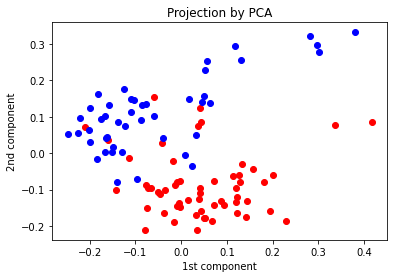

In [79]:
reds = df['class.labels'] == 'art'
blues = df['class.labels'] == 'music'

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X_pca[np.array(reds), 0], X_pca[np.array(reds), 1], c="red")
plt.scatter(X_pca[np.array(blues), 0], X_pca[np.array(blues), 1], c="blue")
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

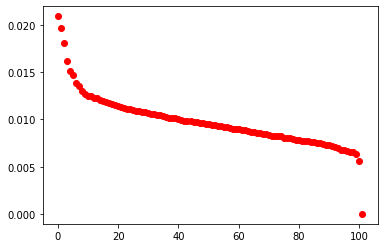

0.15773478029003493


In [81]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()
print(sum(variance_ratio[0:10]))